In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## QUESTION ONE

In [2]:
import numpy as np 

In [3]:
"../input/logistic-regression-dataset-Social-Network_Ads.csv"

'../input/logistic-regression-dataset-Social-Network_Ads.csv'

In [4]:
import os;
os.listdir('/kaggle/input/')

['social-network', 'scholars']

In [5]:
my_data = pd.read_csv('../input/social-network/logistic-regression-dataset-Social-Network_Ads.csv')

In [6]:
my_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
my_data=pd.get_dummies(my_data,columns=['Gender'],drop_first=True)
my_data['Gender_Male']=my_data['Gender_Male'].astype(int)

In [11]:
my_data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [8]:
x = my_data[['Age', 'EstimatedSalary','Gender_Male']]  # Features
y = my_data['Purchased'] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1234)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [12]:
prediction=model.predict(X_test_scaled)

In [13]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [14]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

In [15]:
accuracy=accuracy_score(y_test,prediction)
accuracy

0.86

In [17]:
confusion =confusion_matrix(y_test,prediction)
print('confusion matrix=')
print(confusion)

confusion matrix=
[[61  7]
 [ 7 25]]


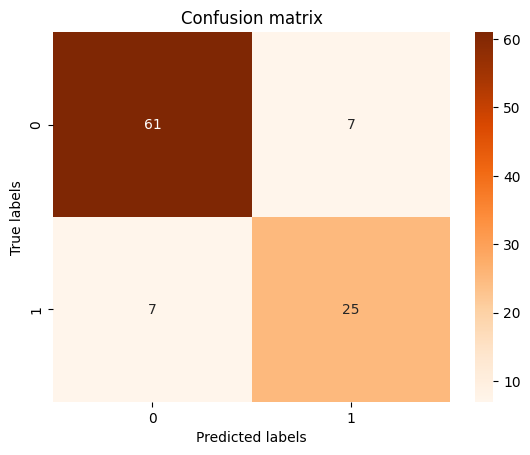

In [18]:
sns.heatmap(confusion,annot=True,cmap='Oranges',fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## QUESTION 1 b and 1c


Solver: newton-cg
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.82      0.76      0.79        37

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix:
[[57  6]
 [ 9 28]]


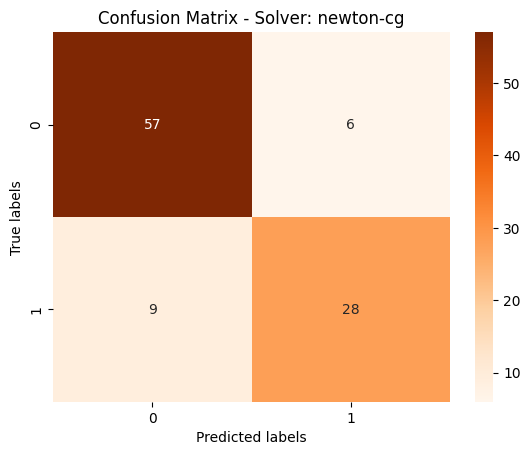


Solver: lbfgs
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.82      0.76      0.79        37

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix:
[[57  6]
 [ 9 28]]


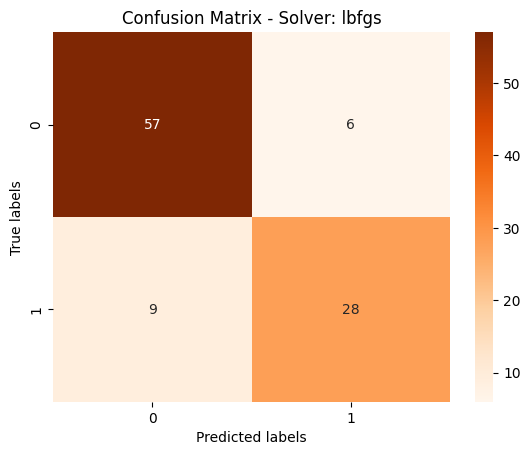


Solver: liblinear
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        63
           1       0.81      0.78      0.79        37

    accuracy                           0.85       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix:
[[56  7]
 [ 8 29]]


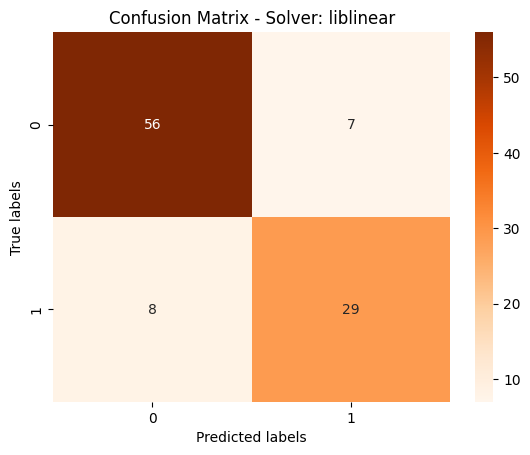


Solver: sag
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.82      0.76      0.79        37

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix:
[[57  6]
 [ 9 28]]


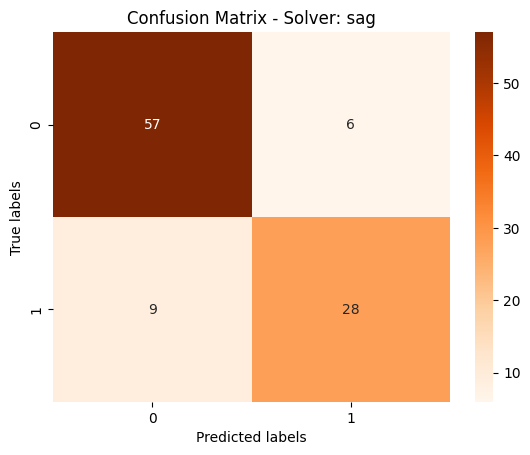


Solver: saga
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.82      0.76      0.79        37

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix:
[[57  6]
 [ 9 28]]


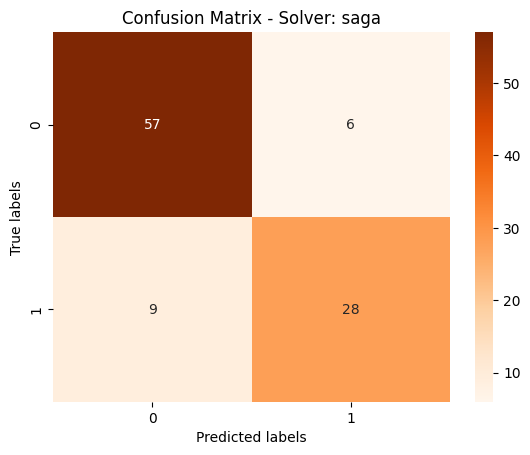

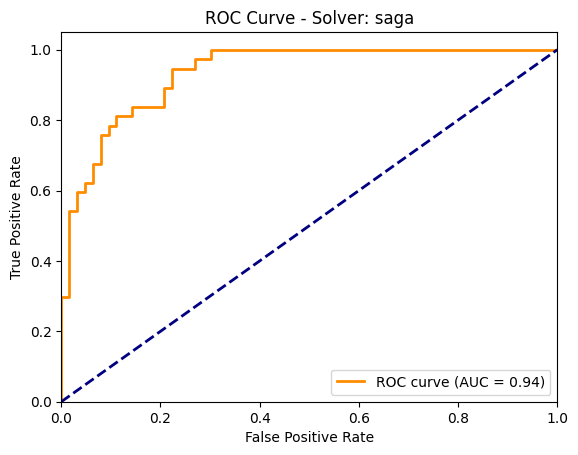

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=123)
scaler = StandardScaler()
X_rscaled = scaler.fit_transform(Xtrain)
X_tscaled = scaler.transform(Xtest)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_rscaled, ytrain)

    ypred = model.predict(X_tscaled)

    accuracy = accuracy_score(ytest, ypred)
    print(f"\nSolver: {solver}")
    print("Accuracy:", accuracy)

    print("Classification Report:")
    print(classification_report(ytest, ypred))

    conf_matrix = confusion_matrix(ytest, ypred)
    print("Confusion Matrix:")
    print(conf_matrix)

    sns.heatmap(conf_matrix, annot=True, cmap='Oranges', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - Solver: {solver}')
    plt.show()
    
y_prob = model.predict_proba(X_tscaled)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)
    
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Solver: {solver}')
plt.legend(loc="lower right")
plt.show()
    
    
    

## The model is accurate with or without the optimizers. i intentially used diiferent seed to check the behaviour.

## QUESTION TWO

In [44]:
'../input/scholars/SolarPrediction.csv'

'../input/scholars/SolarPrediction.csv'

In [45]:
data=pd.read_csv('../input/scholars/SolarPrediction.csv')
#data.head()
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [46]:
Any_missing=data.isnull().sum()
print(Any_missing)

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64


In [47]:
duplicates = data.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [51]:
cleaned_data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data.dropna(inplace=True)

features = data.drop(columns=['Time','UNIXTime', 'TimeSunRise','TimeSunSet','Data','Radiation'])
target = data['Radiation']
features

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,48,30.46,59,177.39,5.62
1,48,30.46,58,176.78,3.37
2,48,30.46,57,158.75,3.37
3,48,30.46,60,137.71,3.37
4,48,30.46,62,104.95,5.62
...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75
32682,44,30.42,102,117.78,6.75
32683,44,30.42,102,145.19,9.00
32684,44,30.42,101,164.19,7.87


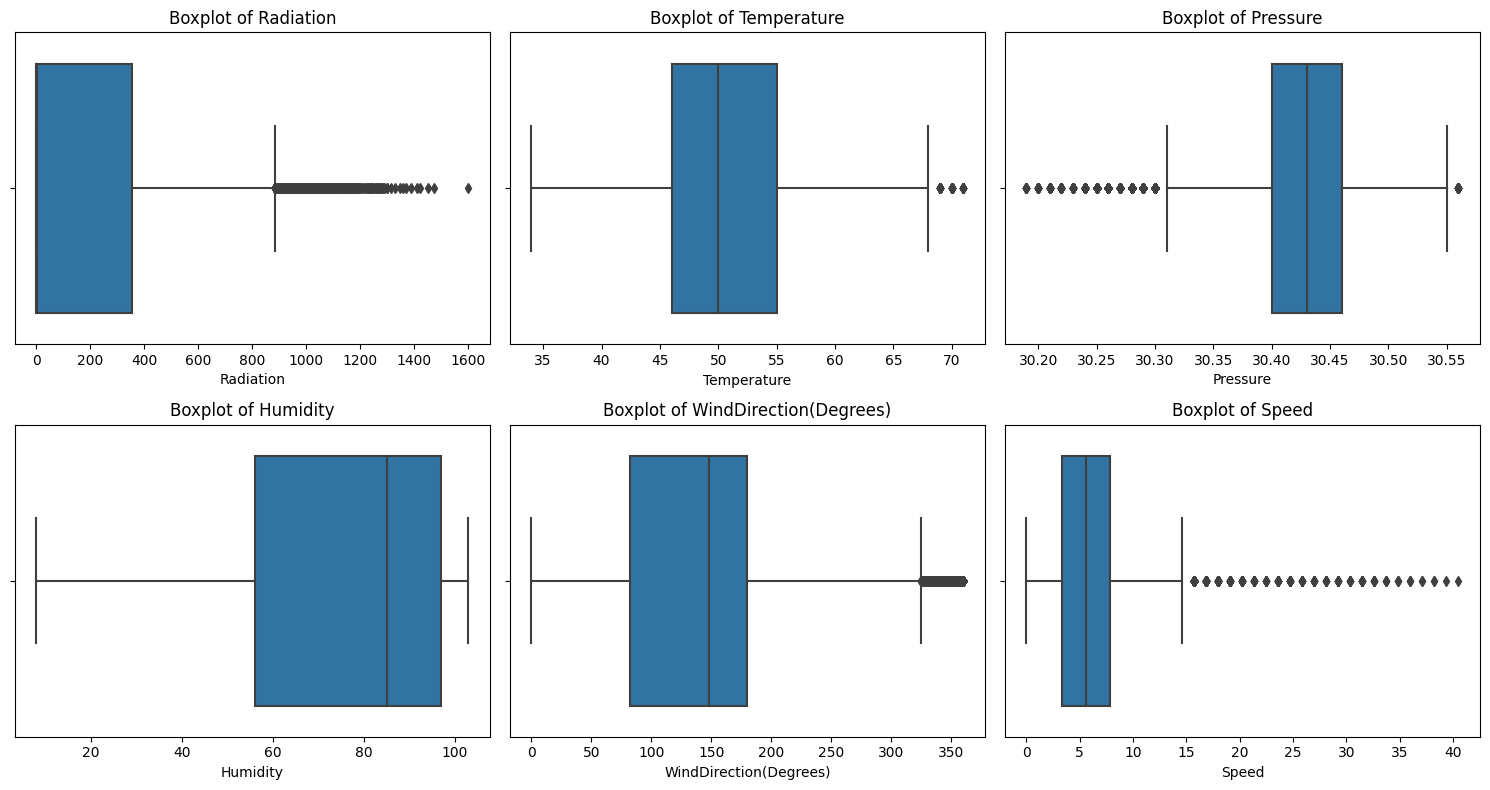

In [181]:
# Choose the columns you want to include in the boxplot
columns_to_plot = ['Radiation','Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',]

# Specify the number of rows and columns in the subplot grid
num_rows = 2
num_columns = len(columns_to_plot) // num_rows + (len(columns_to_plot) % num_rows > 0)

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 8))

# Flatten the 2D array of subplots into a 1D array for easier indexing
axes = axes.flatten()

# Create boxplots for each selected column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
pip install Torch

In [182]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

## FORMULATING MODEL WITH OUTLIERS

In [183]:
respond = data['Radiation'].values
train, test, ytrain, ytest = train_test_split(features , respond, test_size=0.20, random_state=1234)
train

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
31159,52,30.39,55,101.22,3.37
26969,59,30.46,49,58.70,9.00
9480,49,30.45,101,138.12,7.87
29761,46,30.30,93,155.67,3.37
20577,52,30.44,101,129.84,6.75
...,...,...,...,...,...
27852,56,30.56,66,120.97,7.87
23605,45,30.42,29,185.52,9.00
1318,47,30.46,69,187.35,7.87
25299,42,30.34,100,165.96,4.50


In [184]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)


In [185]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [186]:
model = NeuralNetwork(input_size=X_train_tensor.shape[1], hidden_size1=64, hidden_size2=32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [188]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


train, test, ytrain, ytest = train_test_split(features, respond, test_size=0.20, random_state=1234)


scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(ytrain, dtype=torch.float32).view(-1, 1)  
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(ytest, dtype=torch.float32).view(-1, 1)  


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = NeuralNetwork(input_size=X_train_tensor.shape[1], hidden_size1=64, hidden_size2=32)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 1000  
for epoch in range(num_epochs):
   
    model.train()  
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    
    optimizer.step()
    
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


model.eval()  
with torch.no_grad():
    y_pred = model(X_test_tensor)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test_tensor, y_pred))
    r2 = r2_score(y_test_tensor, y_pred)
    mae = mean_absolute_error(y_test_tensor, y_pred)
    mse = criterion(y_pred, y_test_tensor)
    
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared (R^2) Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse.item():.4f}")



Epoch [100/1000], Loss: 137210.9531
Epoch [200/1000], Loss: 99440.6016
Epoch [300/1000], Loss: 57329.2344
Epoch [400/1000], Loss: 45117.9258
Epoch [500/1000], Loss: 39845.7773
Epoch [600/1000], Loss: 37298.2500
Epoch [700/1000], Loss: 35904.3828
Epoch [800/1000], Loss: 34889.4883
Epoch [900/1000], Loss: 34054.2773
Epoch [1000/1000], Loss: 33418.5820
Root Mean Squared Error: 182.3927
R-squared (R^2) Score: 0.6601
Mean Absolute Error: 117.0164
Mean Squared Error: 33267.0820


In [190]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


rmse = np.sqrt(mean_squared_error(y_test_tensor, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")


r2 = r2_score(y_test_tensor, y_pred)
print(f"R-squared (R^2) Score: {r2:.4f}")


mae = mean_absolute_error(y_test_tensor, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

mse = criterion(y_pred, y_test_tensor)
print(f'Mean Squared Error: {mse.item():.4f}')

Root Mean Squared Error: 182.3927
R-squared (R^2) Score: 0.6601
Mean Absolute Error: 117.0164
Mean Squared Error: 33267.0820


## FORMULATING MODEL WITHOUT OUTLIERS

In [63]:
# Define the list of numerical columns
numerical_columns = ["Radiation","Temperature","Pressure",  "WindDirection(Degrees)","Speed"  ]

# Iterate over each numerical column
for col in numerical_columns:
    # Calculate the first quartile (Q1)
    Q1 = data[col].quantile(0.25)
    
    # Calculate the third quartile (Q3)
    Q3 = data[col].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the dataset
    cleaned_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
cleaned_data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


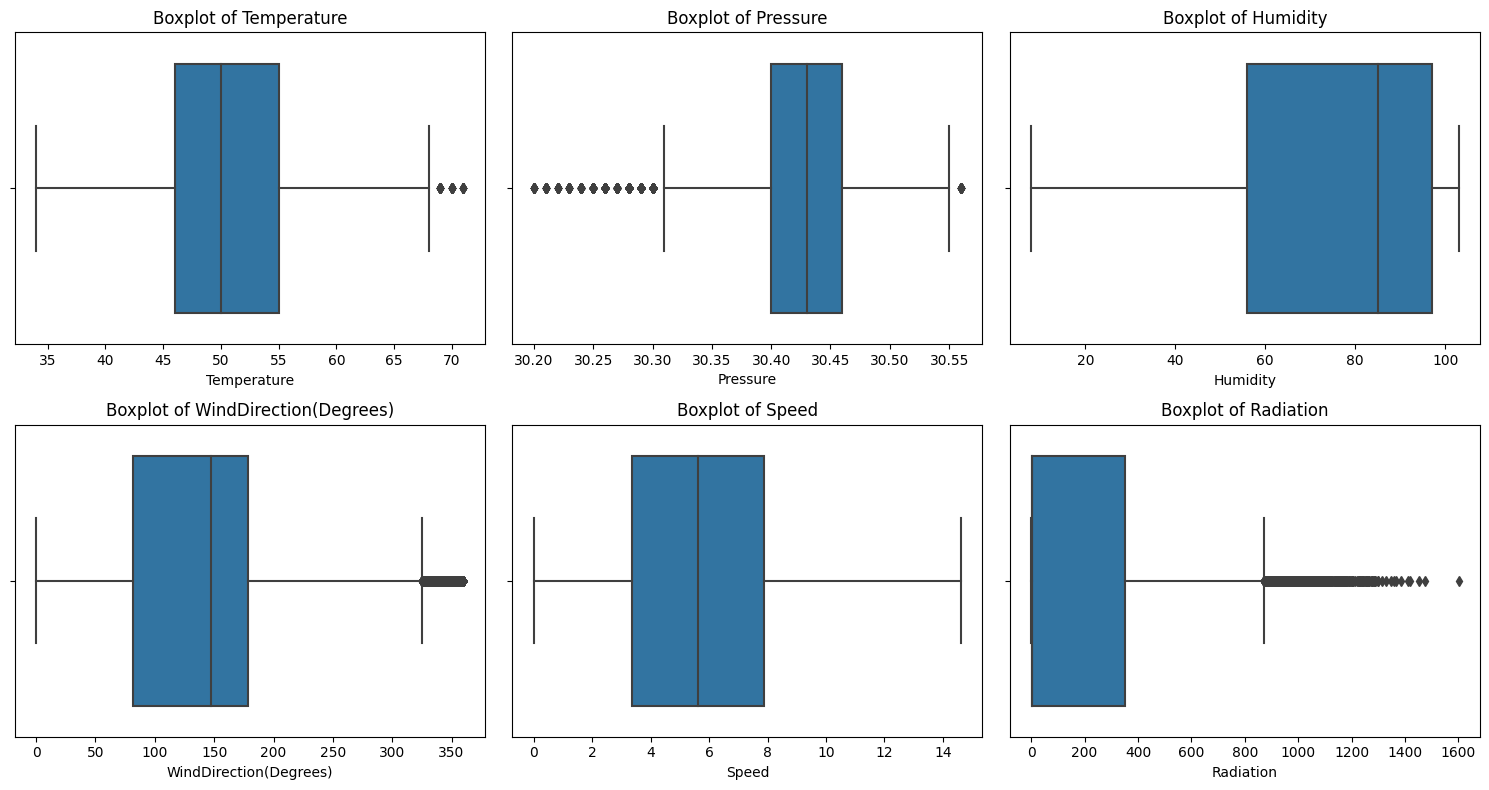

In [64]:
# Choose the columns you want to include in the boxplot
columns_to_plot = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed','Radiation']

# Specify the number of rows and columns in the subplot grid
num_rows = 2
num_columns = len(columns_to_plot) // num_rows + (len(columns_to_plot) % num_rows > 0)

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 8))

# Flatten the 2D array of subplots into a 1D array for easier indexing
axes = axes.flatten()

# Create boxplots for each selected column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=cleaned_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [65]:
cleaned_data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [210]:
cleaned_data.dropna(inplace=True)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_columns = ['Radiation',"Temperature","Pressure", "Humidity","WindDirection(Degrees)","Speed"]
standard_scaler = StandardScaler()
cleaned_data[numerical_columns] = standard_scaler.fit_transform(cleaned_data[numerical_columns])
cleaned_data

predictors = cleaned_data.drop(columns=['Time','UNIXTime', 'TimeSunRise','TimeSunSet','Data','Radiation'])
output = cleaned_data['Radiation']
predictors

/tmp/ipykernel_33/27369339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.dropna(inplace=True)
/tmp/ipykernel_33/27369339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[numerical_columns] = standard_scaler.fit_transform(cleaned_data[numerical_columns])


,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,-0.500027,0.679852,-0.629382,0.414958,-0.139515
1,-0.500027,0.679852,-0.668088,0.407624,-0.882172
2,-0.500027,0.679852,-0.706794,0.190854,-0.882172
3,-0.500027,0.679852,-0.590677,-0.062103,-0.882172
4,-0.500027,0.679852,-0.513265,-0.455967,-0.139515
...,...,...,...,...,...
32681,-1.145557,0.113327,1.034959,0.030592,0.233465
32682,-1.145557,-0.075514,1.034959,-0.301716,0.233465
32683,-1.145557,-0.075514,1.034959,0.027826,0.976122
32684,-1.145557,-0.075514,0.996253,0.256258,0.603143


In [211]:


output= cleaned_data['Radiation']
X_Crain, X_Cest, Ctrain, Ctest = train_test_split(predictors, output, test_size=0.2, random_state=1234)
X_Crain

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
8971,1.275181,-0.453198,-0.435854,-1.405521,0.603143
30402,0.468268,-0.642039,0.957548,2.158250,0.976122
32347,-0.984174,-1.208564,0.686608,0.562717,1.345801
10647,-0.500027,0.113327,0.570492,-0.630777,0.233465
31471,-0.984174,-2.152773,0.686608,-1.435217,-0.509193
...,...,...,...,...,...
28088,0.791033,1.246377,0.764020,-1.656434,-0.882172
23773,1.759328,-0.264356,-1.248672,-0.923771,0.603143
1320,-0.661409,0.679852,-0.281032,0.236781,0.233465
25480,-0.500027,-1.397406,0.957548,-0.982081,1.718780


In [215]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

In [216]:

Ctrain_array = np.array(Ctrain).reshape(-1, 1)
Ctest_array = np.array(Ctest).reshape(-1, 1)

Ctrain_tensor = torch.tensor(Ctrain_array, dtype=torch.float32)
Ctest_tensor = torch.tensor(Ctest_array, dtype=torch.float32)
X_Crain_tensor = torch.tensor(X_Ctrain, dtype=torch.float32)
X_Cest_tensor = torch.tensor(X_Ctest, dtype=torch.float32)

In [217]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.relu = nn.ReLU()
    def forward(self, a):
        a = self.relu(self.fc1(a))
        a = self.relu(self.fc2(a))
        a = self.fc3(a)
        return a


In [218]:
model1 = NeuralNetwork(input_size=X_Crain_tensor.shape[1], hidden_size1=64, hidden_size2=32)
criteria = nn.MSELoss()
optim = optim.Adam(model.parameters(), lr=0.001)


In [207]:
num_epochs = 100
for epoch in range(num_epochs):
    model1.train()
    optimizer.zero_grad()
    outputs1 = model(X_Cest_tensor)
    losss = criterion(outputs1, Ctest_tensor)
    losss.backward()
    optim.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {losss.item():.4f}')

Epoch [10/100], Loss: 91187.6250
Epoch [20/100], Loss: 77266.4375
Epoch [30/100], Loss: 65351.0781
Epoch [40/100], Loss: 55320.3984
Epoch [50/100], Loss: 46995.2695
Epoch [60/100], Loss: 40160.0117
Epoch [70/100], Loss: 34581.6797
Epoch [80/100], Loss: 30055.9082
Epoch [90/100], Loss: 26392.4922
Epoch [100/100], Loss: 23409.0234


In [208]:
model1.eval()
with torch.no_grad():
    y_pred1 = model(X_Cest_tensor)
q=criterion(y_pred1, Ctest_tensor)
q

tensor(23141.7676)

In [139]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


rmse = np.sqrt(mean_squared_error(Ctest_tensor, y_pred1))
print(f"Root Mean Squared Error: {rmse:.4f}")


r2 = r2_score(Ctest_tensor, y_pred1)
print(f"R-squared (R^2) Score: {r2:.4f}")


mae = mean_absolute_error(Ctest_tensor, y_pred1)
print(f"Mean Absolute Error: {mae:.4f}")

mse = criterion(Ctest_tensor, y_pred1)
print(f'Mean Squared Error: {mse.item():.4f}')

Root Mean Squared Error: 182.2536
R-squared (R^2) Score: 0.6592
Mean Absolute Error: 117.2512
Mean Squared Error: 33216.3594


## This model has low R-Squared and a high mean squared error. The data set has more outliers and i used twoo cases where the outliers were removed and cases the outliers were not removed. Comparing it to the guys' own, my model needs a lot of work to be done on it to improve the accuracy and the r squared.